# Gradient descent illustration

This notebook quickly illustrates the gradient descent algorithm on a convex function

The **energy** (or **error**) function that we will consider is, for $a, b > 0,\, c\in \mathbb{R}$:
$$  \begin{array}{rcl}
E \:\colon\: \mathbb{R}^2 &\to& \mathbb{R} \\
  w = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix} &\mapsto& E(w) = a w_1^2 + b w_2^2 + c
 \end{array}
$$

Define the function in Python:

In [1]:
import numpy as np

In [2]:
a, b, c = 1, 2, 3  # examples of coefficients, global variables

In [3]:
def E(w1, w2):
    """ Output E(w), w1 and w2 are the coordinates (can be arrays)"""
    return a * w1**2 + b * w2**2 + c

Plot the function on a square 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm  # colormaps

Enable interactive plotting:

In [5]:
%matplotlib inline 

In [12]:
# allow to use LaTeX typeset in the labels etc.
plt.rcParams.update({
        "text.usetex": True,
        })

In [13]:
xx = np.linspace(-1, 1, num=100)
yy = np.linspace(-1, 1, num=100)

In [14]:
W1, W2 = np.meshgrid(xx, yy)   # 2D arrays 

In [15]:
# Set up a figure twice as wide as it is wide
fig = plt.figure(figsize=(9, 4))
#

Text(0.5, 0.98, 'Energy function $E$')

<Figure size 900x400 with 0 Axes>

In [16]:
Z = E(W1, W2)  # E works on grid

In [17]:
# 3D plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')  # parameters are N_row, N_col, N_row

In [18]:
surf = ax1.plot_surface(W1, W2, Z, cmap=cm.coolwarm, antialiased=True)
ax1.set_xlabel("$w_1$")
ax1.set_ylabel("$w_2$")
ax1.set_zlabel("$E(w)$")
ax1.set_title("3D plot")

Text(0.5, 0.92, '3D plot')

In [19]:
# Contour plot
ax2 = fig.add_subplot(1, 2, 2)  # parameters are N_row, N_col, index

In [20]:
# (Filled) Contour plot
cont = ax2.contourf(W1, W2, Z, cmap=cm.coolwarm)
ax2.set_xlabel("$w_1$")
ax2.set_ylabel("$w_2$")
ax2.set_title("Contour plot")

Text(0.5, 1.0, 'Contour plot')

In [45]:
plt.tight_layout()  # better margins
fig.suptitle("Energy function $E$")

Text(0.5, 0.98, 'Energy function $E$')

<Figure size 640x480 with 0 Axes>

In [22]:
#color bar
fig.subplots_adjust(right=0.8)
cbar_ax=fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cont, cax=cbar_ax)

In [24]:
plt.show()  # show the plot

## Compute the gradient

The gradient of $E$ is 
$$ 
\nabla E(w) = \begin{pmatrix} \partial_{w_1} E(w) \\ \partial_{w_2} E(w) \end{pmatrix}
= \begin{pmatrix} 2a w_1 \\ 2b w_2 \end{pmatrix}
$$
We can plot the gradient as a **2D vector field**: each point gets associated a 2D vector

In [25]:
# coordinates of the gradient
G1 = a * W1[::10, ::10] # low sample the grid to better see
G2 = b * W2[::10, ::10]

Text(0.5, 1.0, '$\\nabla E(w)$')

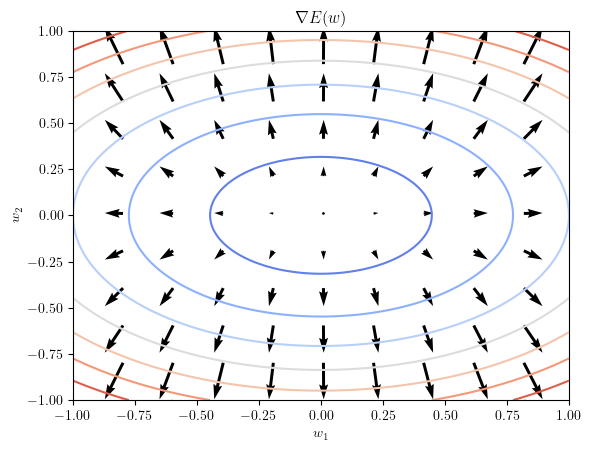

In [26]:
fig, ax = plt.subplots()
cont = ax.contour(W1, W2, Z, cmap=cm.coolwarm)
ax.quiver(W1[::10,::10], W2[::10,::10], G1, G2, cmap=cm.viridis)  # quiver function from matplotlib to plot arrows
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.set_title("$\\nabla E(w)$")

In [27]:
#color bar
fig.subplots_adjust(right=0.8)
cbar_ax=fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(cont, cax=cbar_ax)

In [28]:
plt.show()

Notice how the gradient points towards the **increasing** direction for $E$.

## Gradient descent

The direction we would like to follow in order to **minimize** $E$ is $- \nabla_w E(w)$.

### The algorithm
Given a **starting point** $w^{(0)} \in \mathbb{R}^2$ and some (small) **step
size** $\eta > 0$ (also called **learning rate** in machine
learning), the gradient descent algorithm on an energy $E$ is defined
as, for a step $k \in \mathbb{N}$, 
\begin{alignat}{2} 
 &&w^{(k+1)} &= w^{(k)} - \eta \nabla_w E(w^{(k)}) \\
&\iff &\begin{pmatrix} w_1^{(k+1)} \\ w_2^{(k+1)} \end{pmatrix} &=
\begin{pmatrix} w_1^{(k)} - 2\eta a w_1^{(k)} \\ w_2^{(k)} - 2\eta b w_2^{(k)}
\end{pmatrix} 
\end{alignat}
\begin{equation}
\iff \left\{ \begin{split} w_1^{(k+1)} &= (1-2\eta a) w_1^{(k)} \\
w_2^{(k+1)} &= (1-2\eta b) w_2^{(k)}  \end{split} \right. .
\end{equation}

With some small $\eta$, e.g. $\eta = 10^{-3}$, and number of iterations $T =
1000$, 

In [29]:
def gradient_E(w1, w2):
    """Compute the gradient of E at some given point (w1, w2)"""
    return np.array([2*a*w1, 2*b*w2])  # returns a Numpy array

In [30]:
np.random.seed(1)  # set the random seed for reproducibility

In [31]:
# Initialization
w = np.random.uniform(-1., 1., (2,)) # uniform sampling on the 2D square [-1, 1]
grad_w = gradient_E(*w)
print("Initial w:", w)
# to log the training values
stats = {'w':[w], 'E':[E(*w)]}  # start at initialization

Initial w: [-0.16595599  0.44064899]


In [32]:
eta = 0.001  # "small enough"

In [33]:
T = 1000

In [34]:
for k in range(T):
    grad_w = gradient_E(*w)
    w = w - eta * grad_w
    stats['w'].append(w)  # append to the list of values
    stats['E'].append(E(*w))

In [35]:
Warr = np.array(stats['w'])  # construct the numpy 2D array from a list of 2D

In [36]:
import utils   # for plotting utility

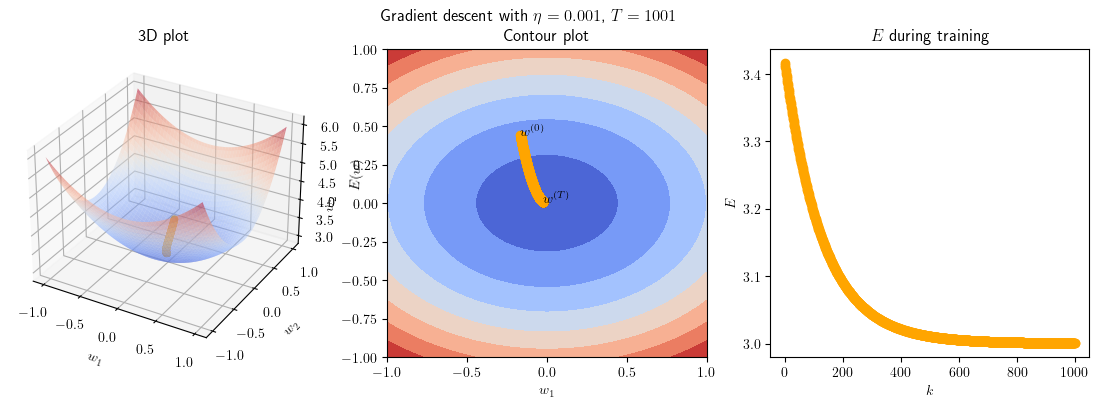

In [37]:
utils.plot_GD((W1, W2, Z), (Warr, stats['E']), eta)

### Choosing the step size

Previously, the step size $\eta$ has been chosen arbitrarily ("small enough").
A natural, principled condition on the step size can be derived from a **descent requirement** the
energy: the energy $E$ at step $k+1$, $E(w^{(k+1)})$, has to be **smaller** than the energy at
step $k$, $E(w^{(k)})$:

\begin{alignat}{2}
&& E(w^{(k+1)}) - E(w^{(k)}) &< 0 \\
&\iff& a \Big((w_1^{(k+1)})^2 - (w_1^{(k)})^2 \Big) + b
\Big((w_2^{(k+1)})^2 - (w_2^{(k)})^2 \Big) &< 0
\\
& \iff &  a (w_1^{(k)})^2\Big( (1-2\eta a)^2 - 1 \Big) + b (w_2^{(k)})^2 \Big(
(1-2\eta b)^2 - 1\Big) &< 0
\\
 & \iff & 4\eta a^2 (w_1^{(k)})^2(1-\eta a) +4\eta b^2 (w_2^{(k)})^2 (  1-\eta b) &> 0
\\
 & \iff &  (w_1^{(k)})^2(1-\eta a) + (w_2^{(k)})^2 (  1-\eta b) &> 0.
\end{alignat}
Therefore, choosing a step size $\eta$ such that 
$$
\left\{ \begin{array}{rl}
1-\eta a &>0 \\ 1-\eta b &>0 \end{array} \right. \iff \left\{
\begin{array}{rl} \eta < \frac1a \\ \eta < \frac1b \end{array}\right. \iff
\eta < \min\left(\frac1a,\frac1b\right) \Longleftarrow \eta  = \frac12
\min\left(\frac1a, \frac1b\right).
$$ 
ensures to respect the  descent assumption. 

### Stoping criterion

Likewise, to stop the algorithm, a maximum number of iteration was used
previously. A more principled approach is to define a  **stopping criterion**, usually checking if the norm of
the gradient is "small enough", or if the energy is "low enough". This way, we
are ensured that, at the end of the training, some condition on the loss (or
its gradient) is fulfilled. The drawback is that we have to be sure that the
stopping criterion will be met, otherwise the training is infinite.
A wise middle ground is to use both a maximum number of iterations and an
stopping criterion to exit the training as soon as we are good enough.

In [38]:
eta = min(1/a, 1/b)/2   # the new learning rate

In [39]:
print("eta = {}".format(eta))

eta = 0.25


new initialization

In [40]:
w = np.random.uniform(-1., 1., (2,)) # uniform sampling on the 2D square [-1, 1]
grad_w = gradient_E(*w)
print("Initial w:", w)
# to log the training values
stats = {'w':[w], 'E':[E(*w)]}  # start at initialization

Initial w: [-0.99977125 -0.39533485]


In [41]:
tol = 1e-3  # tolerance 
MAX_STEP = 10_000
nstep = 0
converged = False

In [42]:
while not converged:  # condition for stopping
    grad_w = gradient_E(*w)
    w = w - eta * grad_w
    stats['w'].append(w)  # remb
    stats['E'].append(E(*w))
    nstep += 1
    converged = np.linalg.norm(grad_w) < tol or nstep > MAX_STEP

In [43]:
Warr = np.array(stats['w'])  # construct the numpy 2D array from a list of 2D
                             # points

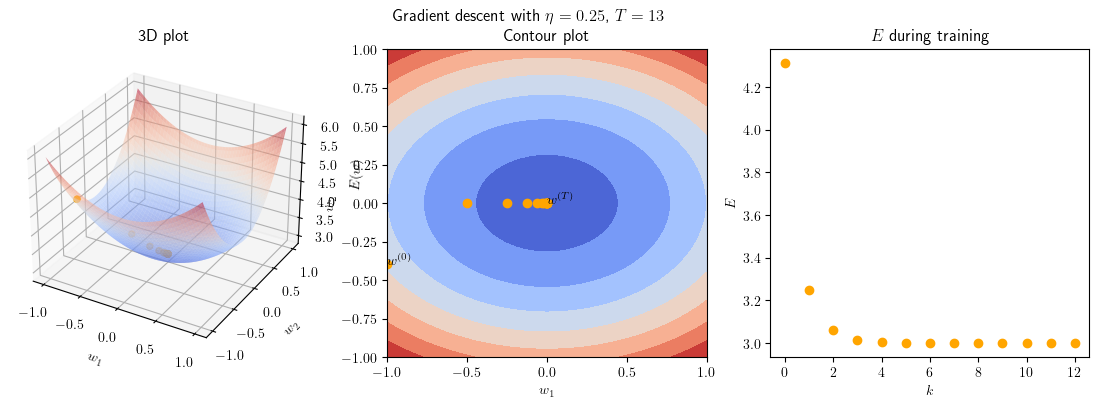

In [44]:
utils.plot_GD((W1, W2, Z), (Warr, stats['E']), eta)

In [ ]:
print("#step:", nstep, ", final w:", w)